# import librarys and dataset

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from datetime import date
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [51]:
df = pd.read_csv('/content/marketing_campaign.csv', sep='\t',parse_dates=True )

In [52]:
len(df)

2240

# clenning the data

i drop data that has a NULL value and remove the data that not realistic from the dataset  

In [53]:
df[df['Income'] > 600000]=np.nan


In [54]:
df= df.dropna()
df= df.drop(['Z_Revenue','Z_CostContact'],axis=1)

In [55]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524.0,1957.0,Graduation,Single,58138.0,0.0,0.0,04-09-2012,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2174.0,1954.0,Graduation,Single,46344.0,1.0,1.0,08-03-2014,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4141.0,1965.0,Graduation,Together,71613.0,0.0,0.0,21-08-2013,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6182.0,1984.0,Graduation,Together,26646.0,1.0,0.0,10-02-2014,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5324.0,1981.0,PhD,Married,58293.0,1.0,0.0,19-01-2014,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870.0,1967.0,Graduation,Married,61223.0,0.0,1.0,13-06-2013,46.0,709.0,43.0,182.0,42.0,118.0,247.0,2.0,9.0,3.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2236,4001.0,1946.0,PhD,Together,64014.0,2.0,1.0,10-06-2014,56.0,406.0,0.0,30.0,0.0,0.0,8.0,7.0,8.0,2.0,5.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2237,7270.0,1981.0,Graduation,Divorced,56981.0,0.0,0.0,25-01-2014,91.0,908.0,48.0,217.0,32.0,12.0,24.0,1.0,2.0,3.0,13.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2238,8235.0,1956.0,Master,Together,69245.0,0.0,1.0,24-01-2014,8.0,428.0,30.0,214.0,80.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# data preprocessing 

First i converted cutomer birthdate to his age for make it more easier to read by the model. secandly i sum number of children that the customers have in one attribute column.Then i sum the number of how much a customer porchases a product. last thing i sum the amount spent on each item to one column.

In [56]:
df['Year_Birth']= 2010 - df['Year_Birth']

In [57]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524.0,53.0,Graduation,Single,58138.0,0.0,0.0,04-09-2012,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2174.0,56.0,Graduation,Single,46344.0,1.0,1.0,08-03-2014,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4141.0,45.0,Graduation,Together,71613.0,0.0,0.0,21-08-2013,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6182.0,26.0,Graduation,Together,26646.0,1.0,0.0,10-02-2014,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5324.0,29.0,PhD,Married,58293.0,1.0,0.0,19-01-2014,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870.0,43.0,Graduation,Married,61223.0,0.0,1.0,13-06-2013,46.0,709.0,43.0,182.0,42.0,118.0,247.0,2.0,9.0,3.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2236,4001.0,64.0,PhD,Together,64014.0,2.0,1.0,10-06-2014,56.0,406.0,0.0,30.0,0.0,0.0,8.0,7.0,8.0,2.0,5.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2237,7270.0,29.0,Graduation,Divorced,56981.0,0.0,0.0,25-01-2014,91.0,908.0,48.0,217.0,32.0,12.0,24.0,1.0,2.0,3.0,13.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2238,8235.0,54.0,Master,Together,69245.0,0.0,1.0,24-01-2014,8.0,428.0,30.0,214.0,80.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
df['child'] = df['Kidhome'].values + df['Teenhome'].values
df.drop(['Kidhome','Teenhome','ID'],axis=1)
df['num_of_Purchases'] = df['NumDealsPurchases'].values + df['NumWebPurchases'].values + df['NumStorePurchases'].values + df['NumWebVisitsMonth'].values + df['NumCatalogPurchases'].values
df = df.drop(['NumDealsPurchases','NumWebPurchases','NumStorePurchases','NumWebVisitsMonth','NumCatalogPurchases'],axis=1)


df['Time_With_Company'] = pd.to_datetime(df.Dt_Customer, dayfirst = True, format = '%d-%m-%Y')
df['Time_With_Company'] = pd.to_numeric(df.Time_With_Company.dt.date.apply(lambda z: (date.today() - z)).dt.days, downcast = 'integer') / 30
df['Dt_Customer']=df['Time_With_Company']
df= df.drop(['Time_With_Company'],axis=1)


dfc = df


df['mut_prudect'] = df['MntWines'].values + df['MntFruits'].values + df['MntMeatProducts'].values + df['MntFishProducts'].values + df['MntSweetProducts'].values + df['MntGoldProds'].values
df=df.drop(['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'],axis=1)


In [59]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,child,num_of_Purchases,mut_prudect
0,5524.0,53.0,Graduation,Single,58138.0,0.0,0.0,109.833333,58.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,32.0,1617.0
1,2174.0,56.0,Graduation,Single,46344.0,1.0,1.0,91.500000,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,11.0,27.0
2,4141.0,45.0,Graduation,Together,71613.0,0.0,0.0,98.133333,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,776.0
3,6182.0,26.0,Graduation,Together,26646.0,1.0,0.0,92.366667,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0,53.0
4,5324.0,29.0,PhD,Married,58293.0,1.0,0.0,93.100000,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24.0,422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870.0,43.0,Graduation,Married,61223.0,0.0,1.0,100.433333,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0,1341.0
2236,4001.0,64.0,PhD,Together,64014.0,2.0,1.0,88.366667,56.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,29.0,444.0
2237,7270.0,29.0,Graduation,Divorced,56981.0,0.0,0.0,92.900000,91.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,1241.0
2238,8235.0,54.0,Master,Together,69245.0,0.0,1.0,92.933333,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,843.0


# data visualization

I visualize the data to make it easier to understand and show the difference in the data.

Text(0, 0.5, 'age')

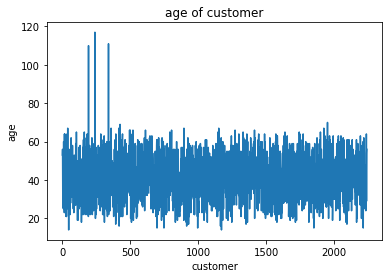

In [60]:
plt.plot(df.index, df['Year_Birth'])
plt.title('age of customer')
plt.xlabel('customer')
plt.ylabel('age')

Text(0, 0.5, 'Income')

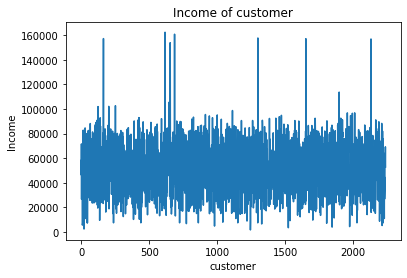

In [61]:
plt.plot(df.index, df['Income'])
plt.title('Income of customer')
plt.xlabel('customer')
plt.ylabel('Income')

Text(0, 0.5, 'mut_prudect')

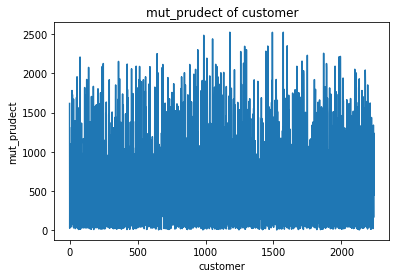

In [62]:
plt.plot(df.index, df['mut_prudect'])
plt.title('mut_prudect of customer')
plt.xlabel('customer')
plt.ylabel('mut_prudect')

In [63]:
 df['child'].unique()

array([0., 2., 1., 3.])

In [64]:
students = [len(df[df['Education']=='Graduation']),len(df[df['Education']=='PhD']),
            len(df[df['Education']=='Master']),len(df[df['Education']=='Basic']),
            len(df[df['Education']=='2n Cycle'])]

In [65]:
state = [len(df[df['Marital_Status']=='Single']),len(df[df['Marital_Status']=='Together']),
            len(df[df['Marital_Status']=='Married']),len(df[df['Marital_Status']=='Divorced']),
            len(df[df['Marital_Status']=='Widow']),len(df[df['Marital_Status']=='Alone']),
         len(df[df['Marital_Status']=='Absurd']),len(df[df['Marital_Status']=='YOLO'])]

In [66]:
child = [len(df[df['child']==0.]),len(df[df['child']==1.]),
         len(df[df['child']==2.]),len(df[df['child']==3.])]
child

[633, 1116, 416, 50]

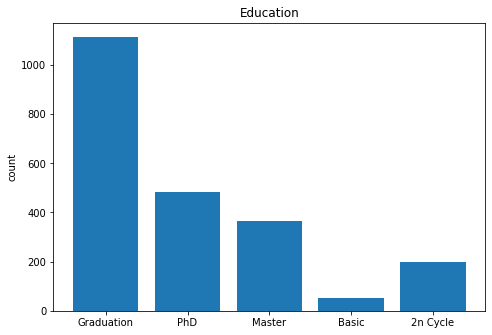

In [67]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = df['Education'].unique()
plt.ylabel('count')
plt.title('Education')
ax.bar(langs,students)
plt.show()

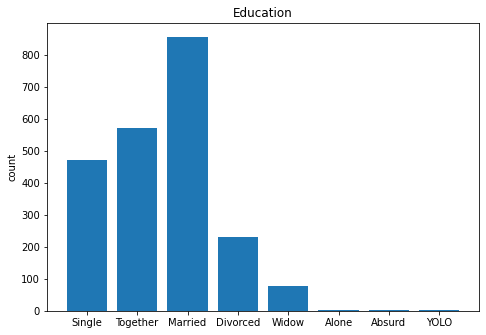

In [68]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs =df['Marital_Status'].unique()
plt.ylabel('count')
plt.title('Education')
ax.bar(langs,state)
plt.show()

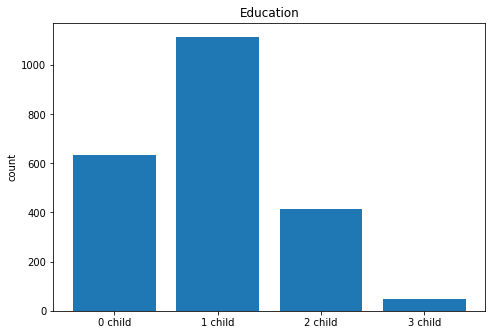

In [69]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs =['0 child','1 child','2 child','3 child']
plt.ylabel('count')
plt.title('Education')
ax.bar(langs,child)
plt.show()

# regression models

I use four types of regression models to see who will give me the best accuracy. 
I train the models to predict for total amount spent and the amount spent for each product type individual.

In [70]:
#x = df[['Year_Birth','Income','child','Recency','Education','Marital_Status']].values
#y = df['mut_prudect'].values
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
ct = ColumnTransformer(transformers= [('encoder',OneHotEncoder(),[2])], remainder= 'passthrough')
x = ct.fit_transform(x)
x[1]

array([0.0, 0.0, 1.0, 0.0, 0.0, 2174.0, 56.0, 'Single', 46344.0, 1.0, 1.0,
       91.5, 38.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 11.0],
      dtype=object)

In [71]:
ct = ColumnTransformer(transformers= [('encoder',OneHotEncoder(),[7])], remainder= 'passthrough')
x = ct.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

In [72]:
x_train.shape

(1772, 29)

In [73]:
x[1]

array([0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       2174.0, 56.0, 46344.0, 1.0, 1.0, 91.5, 38.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 2.0, 11.0], dtype=object)

In [74]:
x_train[0]

array([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       2877.0, 36.0, 46014.0, 1.0, 1.0, 105.2, 21.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 2.0, 33.0], dtype=object)

In [75]:
def lin_reg():
  regrasor = LinearRegression()
  regrasor.fit(x_train,y_train)
  y_pred= regrasor.predict(x_test)
  score = r2_score(y_test,y_pred)
  print('the r2_score = ',score)
  plt.scatter(x[:30,15],y[:30],label = 'Real Data',color = 'r')
  plt.plot(np.sort(x_test[:15,15]),np.sort(y_pred[:15]) ,label = 'Predicted Values',color = 'g')
  plt.grid()
  plt.title('linear')
  plt.xlabel('salary')
  plt.ylabel('amount spent')
  plt.show()

In [76]:
def ridge_reg():
  regrasor = Ridge(alpha=1)
  regrasor.fit(x_train,y_train)
  y_pred= regrasor.predict(x_test)
  score = r2_score(y_test,y_pred)
  print('the r2_score = ',score)
  plt.scatter(x[:30,15],y[:30],label = 'Real Data',color = 'r')
  plt.plot(np.sort(x_test[:15,15]),np.sort(y_pred[:15]) ,label = 'Predicted Values',color = 'g')
  plt.grid()
  plt.title('Ridge')
  plt.xlabel('salary')
  plt.ylabel('amount spent')
  plt.show()

In [77]:
def lasso_reg():
  regrasor = Lasso(alpha=1)
  regrasor.fit(x_train,y_train)
  y_pred= regrasor.predict(x_test)
  score = r2_score(y_test,y_pred)
  print('the r2_score = ',score)
  plt.scatter(x[:30,15],y[:30],label = 'Real Data',color = 'r')
  plt.plot(np.sort(x_test[:15,15]),np.sort(y_pred[:15]) ,label = 'Predicted Values',color = 'g')
  plt.grid()
  plt.title('Lasso')
  plt.xlabel('salary')
  plt.ylabel('amount spent')
  plt.show()

In [78]:
def poly_reg2():
  poly = PolynomialFeatures(degree= 1,include_bias=True)
  x_train_trans = poly.fit_transform(x_train)
  x_test_trans = poly.transform(x_test)
  regrasor = LinearRegression()
  regrasor.fit(x_train_trans,y_train)
  y_pred= regrasor.predict(x_test_trans)
  score = r2_score(y_test,y_pred)
  print('the accuracy = ',score)
  plt.scatter(x[:30,15],y[:30],label = 'Real Data',color = 'r')
  plt.plot(np.sort(x_test[:15,15]),np.sort(y_pred[:15]),label = 'Predicted Values',color = 'g')
  plt.grid()
  plt.title('Polynomial')
  plt.xlabel('salary')
  plt.ylabel('amount spent')
  plt.show()

In [79]:
def grand_reg():
  regrasor = GradientBoostingRegressor(random_state=0)
  regrasor.fit(x_train,y_train)
  y_pred= regrasor.predict(x_test)
  score = r2_score(y_test,y_pred)
  print('the r2_score = ',score)
  plt.scatter(x[:30,15],y[:30],label = 'Real Data',color = 'r')
  plt.plot(np.sort(x_test[:15,15]),np.sort(y_pred[:15]) ,label = 'Predicted Values',color = 'g')
  plt.grid()
  plt.title('gradient boosting')
  plt.xlabel('salary')
  plt.ylabel('amount spent')
  plt.show()

In [80]:
def xgboost_reg():
  regrasor =  XGBRegressor()
  regrasor.fit(x_train,y_train)
  y_pred= regrasor.predict(x_test)
  score = r2_score(y_test,y_pred)
  print('the r2_score = ',score)
  plt.scatter(x[:30,15],y[:30],label = 'Real Data',color = 'r')
  plt.plot(np.sort(x_test[:15,15]),np.sort(y_pred[:15]) ,label = 'Predicted Values',color = 'g')
  plt.grid()
  plt.title('XG boost')
  plt.xlabel('salary')
  plt.ylabel('amount spent')
  plt.show()

In [81]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'child', 'num_of_Purchases', 'mut_prudect'],
      dtype='object')

the r2_score =  0.8317194351006849


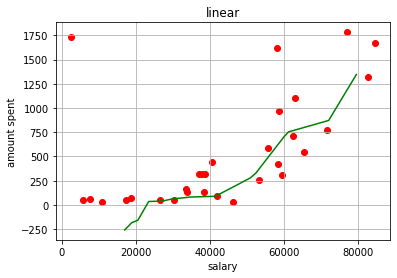

None
the r2_score =  0.8315378645727529


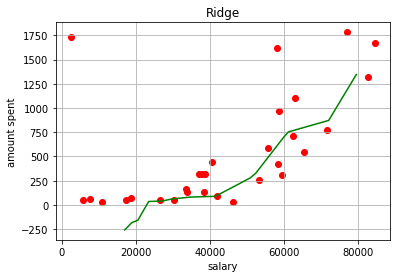

None
the r2_score =  0.8301939996028938


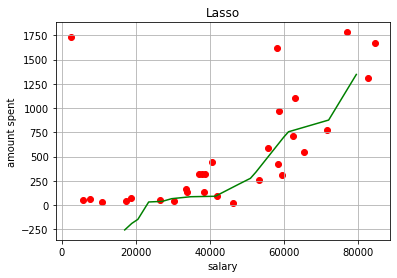

None
the accuracy =  0.8317194351007149


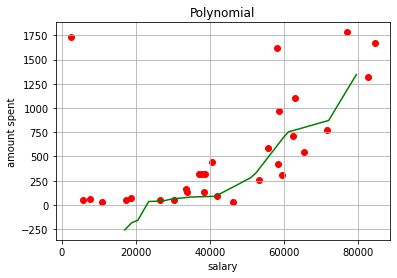

None
[19:57:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
the r2_score =  0.8846310423384107


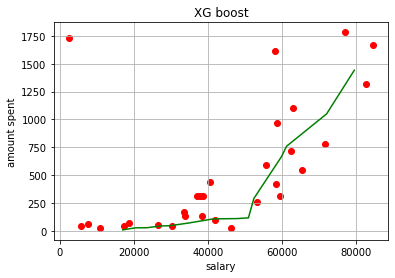

None
the r2_score =  0.8864987888655583


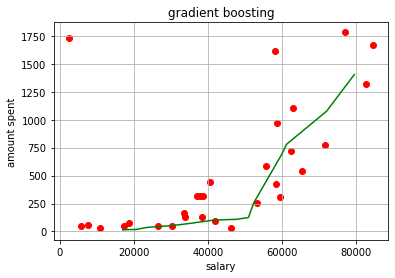

None


In [82]:
print(lin_reg())
print(ridge_reg())
print(lasso_reg())
print(poly_reg2())
print(xgboost_reg())
print(grand_reg())


In [83]:
dfc

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,child,num_of_Purchases,mut_prudect
0,5524.0,53.0,Graduation,Single,58138.0,0.0,0.0,109.833333,58.0,635.0,88.0,546.0,172.0,88.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,32.0,1617.0
1,2174.0,56.0,Graduation,Single,46344.0,1.0,1.0,91.500000,38.0,11.0,1.0,6.0,2.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,11.0,27.0
2,4141.0,45.0,Graduation,Together,71613.0,0.0,0.0,98.133333,26.0,426.0,49.0,127.0,111.0,21.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,776.0
3,6182.0,26.0,Graduation,Together,26646.0,1.0,0.0,92.366667,26.0,11.0,4.0,20.0,10.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0,53.0
4,5324.0,29.0,PhD,Married,58293.0,1.0,0.0,93.100000,94.0,173.0,43.0,118.0,46.0,27.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24.0,422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870.0,43.0,Graduation,Married,61223.0,0.0,1.0,100.433333,46.0,709.0,43.0,182.0,42.0,118.0,247.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0,1341.0
2236,4001.0,64.0,PhD,Together,64014.0,2.0,1.0,88.366667,56.0,406.0,0.0,30.0,0.0,0.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,29.0,444.0
2237,7270.0,29.0,Graduation,Divorced,56981.0,0.0,0.0,92.900000,91.0,908.0,48.0,217.0,32.0,12.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,1241.0
2238,8235.0,54.0,Master,Together,69245.0,0.0,1.0,92.933333,8.0,428.0,30.0,214.0,80.0,30.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,843.0


In [84]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'child', 'num_of_Purchases', 'mut_prudect'],
      dtype='object')

In [85]:
x = dfc[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency','MntGoldProds', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'child',
       'num_of_Purchases']].values
y = dfc[['MntWines']].values

In [86]:
x_train.shape

(1772, 29)

In [87]:

ct = ColumnTransformer(transformers= [('encoder',OneHotEncoder(),[2])], remainder= 'passthrough')
x = ct.fit_transform(x)
ct = ColumnTransformer(transformers= [('encoder',OneHotEncoder(),[7])], remainder= 'passthrough')
x = ct.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

In [88]:
x_train.shape

(1772, 30)

the r2_score =  0.7560928979099854


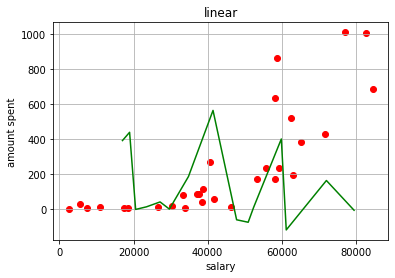

None
the r2_score =  0.7554347725913066


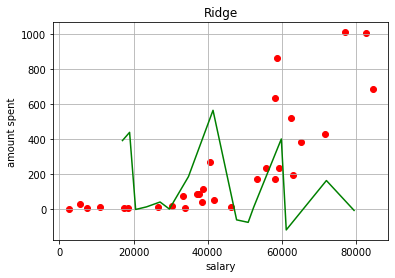

None
the r2_score =  0.747493002850718


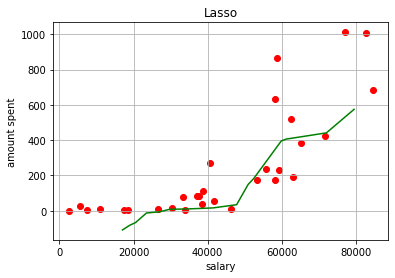

None
the accuracy =  0.7560928979099727


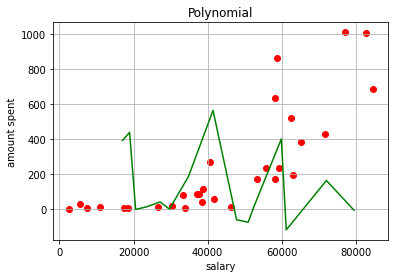

None
[19:57:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
the r2_score =  0.7936018962299662


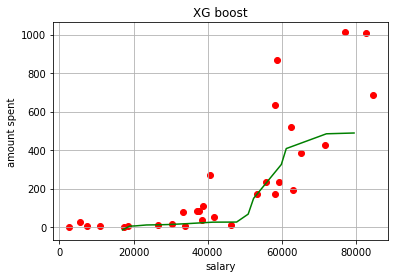

None


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


the r2_score =  0.7973546567075724


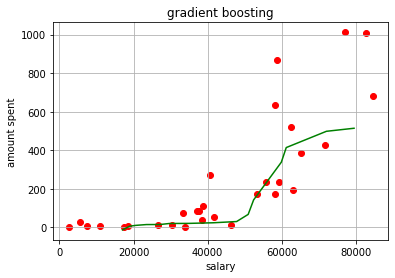

None


In [89]:
print(lin_reg())
print(ridge_reg())
print(lasso_reg())
print(poly_reg2())
print(xgboost_reg())
print(grand_reg())

In [90]:
y = dfc[['MntFruits']].values

the r2_score =  0.7560928979099854


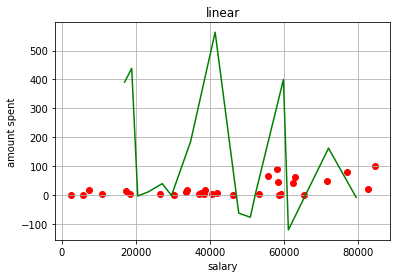

None
the r2_score =  0.7554347725913066


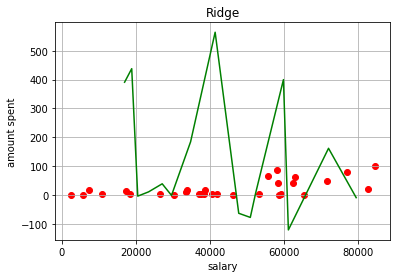

None
the r2_score =  0.747493002850718


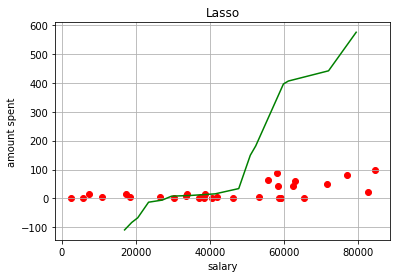

None
the accuracy =  0.7560928979099727


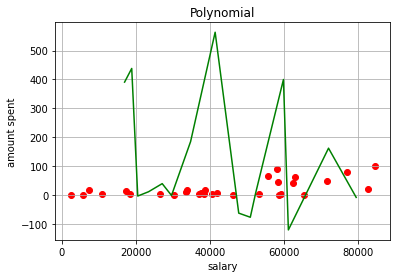

None
[19:57:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
the r2_score =  0.7936018962299662


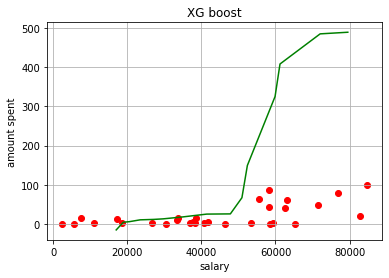

None


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


the r2_score =  0.7973546567075724


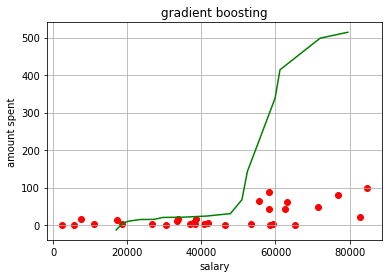

None


In [91]:
print(lin_reg())
print(ridge_reg())
print(lasso_reg())
print(poly_reg2())
print(xgboost_reg())
print(grand_reg())

the r2_score =  0.7560928979099854


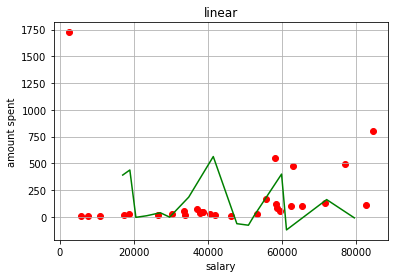

None
the r2_score =  0.7554347725913066


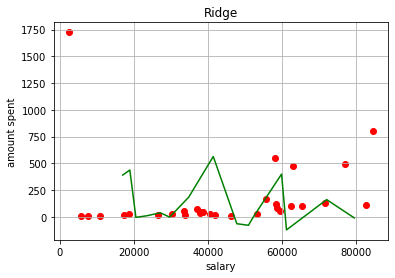

None
the r2_score =  0.747493002850718


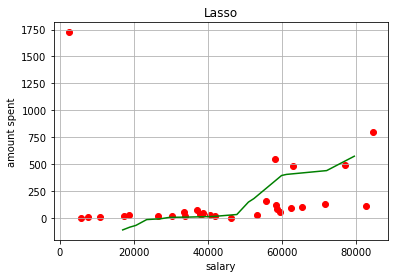

None
the accuracy =  0.7560928979099727


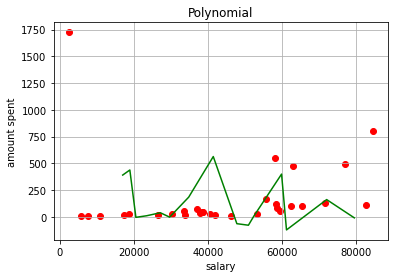

None
[19:57:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
the r2_score =  0.7936018962299662


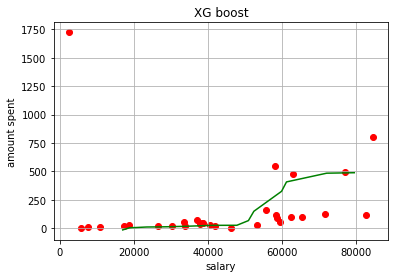

None


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


the r2_score =  0.7973546567075724


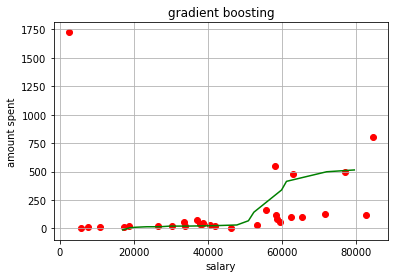

None


In [92]:
y = dfc[['MntMeatProducts']].values
print(lin_reg())
print(ridge_reg())
print(lasso_reg())
print(poly_reg2())
print(xgboost_reg())
print(grand_reg())

the r2_score =  0.7560928979099854


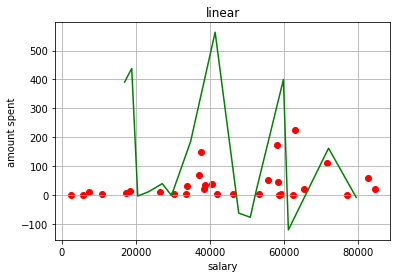

None
the r2_score =  0.7554347725913066


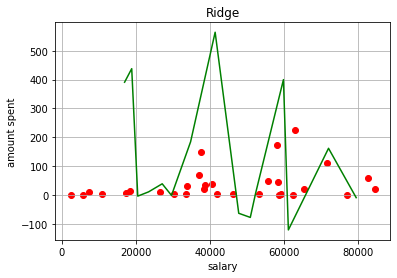

None
the r2_score =  0.747493002850718


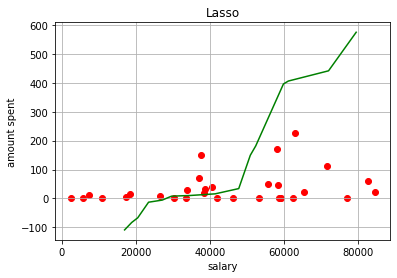

None
the accuracy =  0.7560928979099727


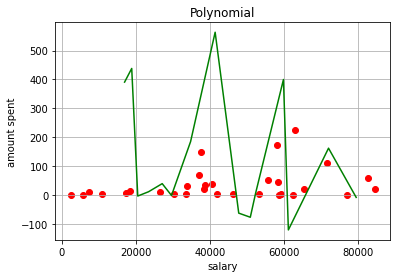

None
[19:57:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
the r2_score =  0.7936018962299662


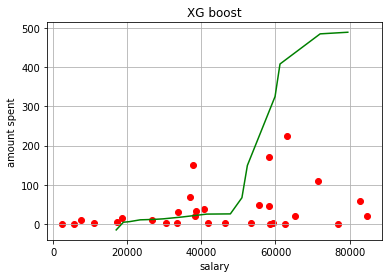

None


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


the r2_score =  0.7973546567075724


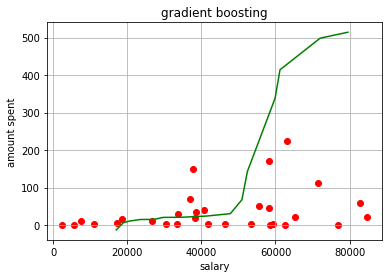

None


In [93]:
y = dfc[['MntFishProducts']].values
print(lin_reg())
print(ridge_reg())
print(lasso_reg())
print(poly_reg2())
print(xgboost_reg())
print(grand_reg())

the r2_score =  0.7560928979099854


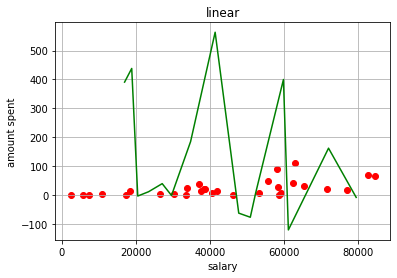

None
the r2_score =  0.7554347725913066


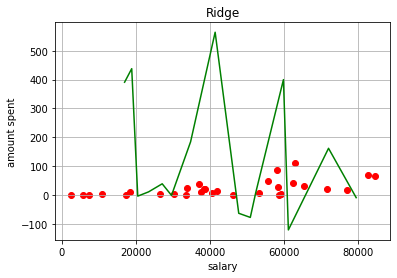

None
the r2_score =  0.747493002850718


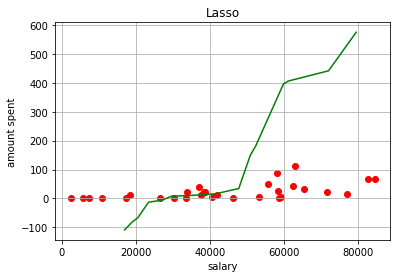

None
the accuracy =  0.7560928979099727


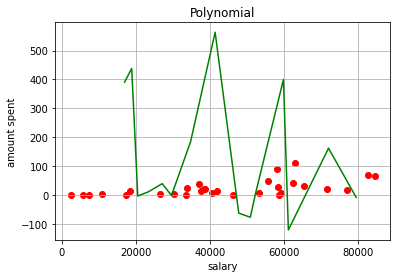

None
[19:57:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
the r2_score =  0.7936018962299662


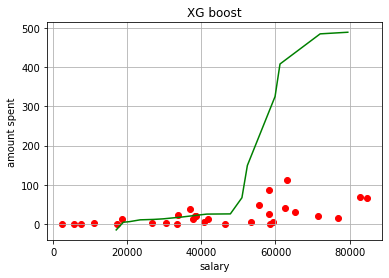

None


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


the r2_score =  0.7973546567075724


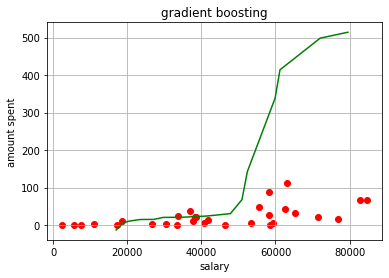

None


In [94]:
y = dfc[['MntSweetProducts']].values
print(lin_reg())
print(ridge_reg())
print(lasso_reg())
print(poly_reg2())
print(xgboost_reg())
print(grand_reg())

the r2_score =  0.7560928979099854


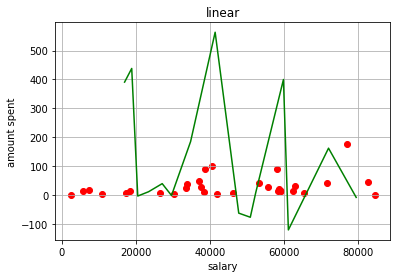

None
the r2_score =  0.7554347725913066


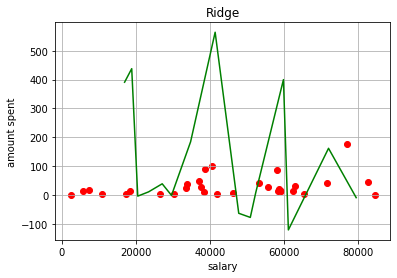

None
the r2_score =  0.747493002850718


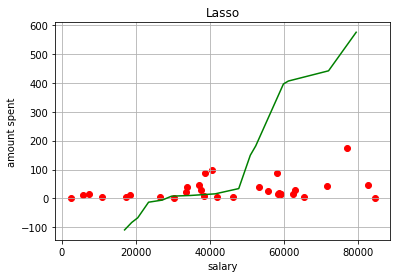

None
the accuracy =  0.7560928979099727


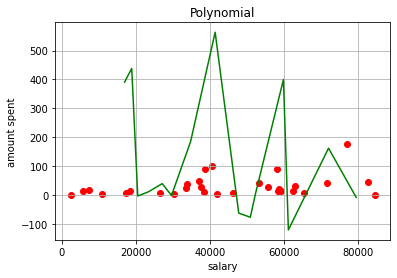

None
[19:57:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
the r2_score =  0.7936018962299662


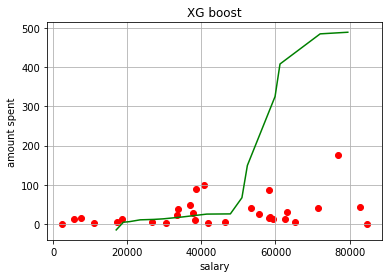

None


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


the r2_score =  0.7973546567075724


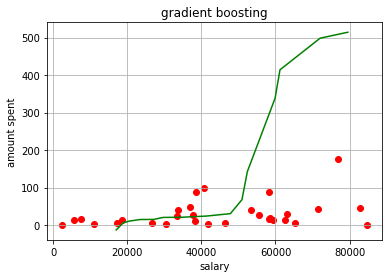

None


In [95]:
y = dfc[['MntGoldProds']].values
print(lin_reg())
print(ridge_reg())
print(lasso_reg())
print(poly_reg2())
print(xgboost_reg())
print(grand_reg())